<a href="https://colab.research.google.com/github/alfredofosu/python.projects/blob/main/_03FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Feature engineering is the process of transforming raw data into meaningful features that can be used to improve the performance of machine learning models. It involves selecting, creating, and transforming features from the raw data to make it more suitable for machine learning algorithms.

The goal of feature engineering is to extract relevant information from the data and represent it in a way that is more informative and easier for the machine learning models to understand. This process often involves domain knowledge, creativity, and experimentation to identify the most informative features.

Some common techniques used in feature engineering include:
- Handling missing data: Imputing missing values or creating binary indicators for missingness.
- Encoding categorical variables: Converting categorical variables into numerical representations that can be used by machine learning algorithms.
- Scaling and normalization: Scaling numerical features to a consistent range or applying normalization techniques to make the data distribution more suitable for modeling.
- Creating interaction terms: Combining multiple features to capture interaction effects that may be relevant for the target variable.
- Feature extraction: Transforming raw data into more informative representations, such as extracting text features from text data or extracting image features using techniques like convolutional neural networks (CNNs).
- Time-based features: Extracting time-related features such as day of the week, month, or time lags between events.

Effective feature engineering can significantly impact the performance of machine learning models by providing them with relevant and meaningful information. It helps models to capture patterns, relationships, and nuances in the data, leading to better predictive accuracy and generalization.

In [ ]:
#@title Create Virtual Environment
from IPython.display import clear_output
# !apt install python3.10-venv
# !python3 -m venv /content/drive/MyDrive/Colab_Notebooks/colab_env

# import sys
# # activate virtual environment
# !source /content/drive/MyDrive/Colab_Notebooks/colab_env/bin/activate
# #  add virtual environment path to colab's system path
# sys.path.append("/content/drive/MyDrive/Colab_Notebooks/colab_env/lib/python3.10/site-packages")
clear_output(wait=False)

In [ ]:
#@title Install needed libraries
!pip install lets-plot
!pip install cairosvg
!pip install feature-engine
!pip install ydata-profiling
clear_output(wait=False)

In [ ]:
#@title Import needed libraries
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

# change into workingspace
%cd /content/drive/MyDrive/Colab_Notebooks/master_thesis/

/content/drive/MyDrive/Colab_Notebooks/master_thesis


In [ ]:
def load_and_transform(path_to_csv_file):
  # load data
  df = pd.read_csv(path_to_csv_file, parse_dates=["date"])

  # change float64 to float32
  df[df.select_dtypes(include='float64').columns] = df[df.select_dtypes(include='float64').columns].astype('float32')

  df = df.rename(columns={"avg_temp": "avg_air_temp", "ttl_precip": "avg_precip",
                          "missingindicator_avg_temp": "missingindicator_avg_air_temp",
                          "missingindicator_ttl_precip": "missingindicator_avg_precip"})

  # df = df[['date', 'major_basin', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-',
  #          'TDS', 'ALKT', 'CNDT', 'HARD', 'pH','avg_water_Temp', 'avg_discharge',
  #          'avg_stage', 'avg_air_temp', 'avg_precip', 'max_Wx', 'max_Wy',
  #          ]]
  return df

wq_wide_df = load_and_transform("./data/monitoring_stations_data/water_quality/model_data/all_model_data_v2.csv")

wq_wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2052 non-null   datetime64[ns]
 1   major_basin                      2052 non-null   object        
 2   Ca2+                             2052 non-null   float32       
 3   Cl-                              2052 non-null   float32       
 4   K+                               2052 non-null   float32       
 5   Mg2+                             2052 non-null   float32       
 6   Na+                              2052 non-null   float32       
 7   SO42-                            2052 non-null   float32       
 8   TDS                              2052 non-null   float32       
 9   ALKT                             2052 non-null   float32       
 10  CNDT                             2052 non-null   float32    

In [ ]:
wq_wide_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ca2+,2052.0,102.607071,24.092312,0.113000,86.297640,102.341167,117.875689,194.763153
Cl-,2052.0,356.717163,374.048096,0.000000,124.892103,221.000000,488.917984,3920.000000
K+,2052.0,3.607884,1.581931,0.003100,2.592789,3.526027,4.544784,20.000000
Mg2+,2052.0,17.310078,4.415199,0.020100,14.359402,17.276427,20.200126,32.381100
Na+,2052.0,208.850296,205.261368,0.000000,85.089384,156.152847,273.786430,2090.000000
SO42-,2052.0,49.451206,15.199901,5.914264,39.360023,48.932943,58.720654,178.303329
TDS,2052.0,973.860291,637.204834,11.247286,568.643799,799.879578,1263.636108,5449.500000
ALKT,2052.0,207.585800,44.906380,62.843636,179.000000,208.420982,238.490021,448.481049
CNDT,2052.0,1606.190796,1143.609497,5.265272,904.125000,1230.000000,2021.629364,11965.000000
HARD,2052.0,329.951630,78.757187,1.000000,277.415619,331.040085,380.536240,621.632751


# WQI Calculator

In [ ]:
wq_wide_wqi = wq_wide_df[["date","Ca2+", "Cl-", "K+", "Mg2+", "Na+", "SO42-", "TDS",
                          "ALKT", "CNDT", "HARD", 'pH',"avg_water_Temp" ]]
wq_wide_wqi_stats = wq_wide_wqi.describe().T

wq_wide_wqi_stats

,count,mean,std,min,25%,50%,75%,max
Ca2+,2052.0,102.607071,24.092312,0.113000,86.297640,102.341167,117.875689,194.763153
Cl-,2052.0,356.717163,374.048096,0.000000,124.892103,221.000000,488.917984,3920.000000
K+,2052.0,3.607884,1.581931,0.003100,2.592789,3.526027,4.544784,20.000000
Mg2+,2052.0,17.310078,4.415199,0.020100,14.359402,17.276427,20.200126,32.381100
Na+,2052.0,208.850296,205.261368,0.000000,85.089384,156.152847,273.786430,2090.000000
SO42-,2052.0,49.451206,15.199901,5.914264,39.360023,48.932943,58.720654,178.303329
TDS,2052.0,973.860291,637.204834,11.247286,568.643799,799.879578,1263.636108,5449.500000
ALKT,2052.0,207.585800,44.906380,62.843636,179.000000,208.420982,238.490021,448.481049
CNDT,2052.0,1606.190796,1143.609497,5.265272,904.125000,1230.000000,2021.629364,11965.000000
HARD,2052.0,329.951630,78.757187,1.000000,277.415619,331.040085,380.536240,621.632751


In [ ]:
#@title Guidlines
guideline = {
    "Ca2+": {
        "name": "Calcium",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 1000},
        "drinking": {"min": 0, "max": 0},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 1000},
    },
    "Cl-": {
        "name": "Chloride",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 110},
        "drinking": {"min": 0, "max": 250},
        "aquatic": {"min": 0, "max": 120},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 110},
        "livestock": {"min": 0, "max": 0},
    },
    "K+": {
        "name": "Potassium",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 0},
        "drinking": {"min": 0, "max": 0},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "Mg2+": {
        "name": "Magnesium",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 0},
        "drinking": {"min": 0, "max": 0},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "Na+": {
        "name": "Sodium",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 200},
        "drinking": {"min": 0, "max": 200},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "SO42-": {
        "name": "Sulphate",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 500},
        "drinking": {"min": 0, "max": 500},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 1000},
    },
    "TDS-": {
        "name": "Total Dissolved Solids",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 500},
        "drinking": {"min": 0, "max": 500},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 500},
        "livestock": {"min": 0, "max": 3000},
    },
    "Temp": {
        "name": "Temperature",
        "unit": "C",
        "overall": {"min": 0, "max": 15},
        "drinking": {"min": 0, "max": 15},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "pH": {
        "name": "pH",
        "unit": "none",
        "overall": {"min": 6.5, "max": 8.5},
        "drinking": {"min": 6.5, "max": 8.5},
        "aquatic": {"min": 6.5, "max": 9},
        "recreation": {"min": 5, "max": 9},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "CNDT": {
        "name": "Conductivity",
        "unit": "uS/cm",
        "overall": {"min": 0, "max": 0},
        "drinking": {"min": 0, "max": 0},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
    "ALKT": {
        "name": "Alkalinity",
        "unit": "mg/L",
        "overall": {"min": 0, "max": 0},
        "drinking": {"min": 0, "max": 0},
        "aquatic": {"min": 0, "max": 0},
        "recreation": {"min": 0, "max": 0},
        "irrigation": {"min": 0, "max": 0},
        "livestock": {"min": 0, "max": 0},
    },
}


In [ ]:
wq_wide_wqi_stats.loc["Ca2+", "max"] >= guideline["Ca2+"]["overall"]["max"]

False

In [ ]:
wq_wide_wqi_stats.loc["Cl-", "max"] >= guideline["Cl-"]["overall"]["max"]

True

In [ ]:
wq_wide_wqi_stats.loc["Na+", "max"] >= guideline["Na+"]["overall"]["max"]

True

In [ ]:
wq_wide_wqi_stats.loc["SO42-", "max"] >= guideline["SO42-"]["overall"]["max"]

False

In [ ]:
wq_wide_wqi_stats.loc["pH", "min"] < guideline["pH"]["overall"]["max"]

True

In [ ]:
wq_wide_wqi_stats.loc["pH", "max"] >= guideline["pH"]["overall"]["min"]

True

In [ ]:
wq_wide_wqi_stats.loc["avg_water_Temp", "max"] > guideline["Temp"]["overall"]["max"]

True

In [ ]:
wq_wide_wqi = wq_wide_wqi.copy()
# Apply the lambda function directly without creating a copy
wq_wide_wqi.loc[:, "Ca_f"] = wq_wide_wqi.loc[:, "Ca2+"].apply(
    lambda x: 1 if x >= guideline["Ca2+"]["overall"]["max"] else 0)

In [ ]:
wq_wide_wqi["Cl_f"] = wq_wide_wqi["Cl-"].apply(
    lambda x: 1 if x >= guideline["Cl-"]["overall"]["max"] else 0)

In [ ]:
wq_wide_wqi["Na_f"] = wq_wide_wqi["Na+"].apply(
    lambda x: 1 if x >= guideline["Na+"]["overall"]["max"] else 0)

In [ ]:
wq_wide_wqi["SO42_f"] = wq_wide_wqi["SO42-"].apply(
    lambda x: 1 if x >= guideline["SO42-"]["overall"]["max"] else 0)

In [ ]:
wq_wide_wqi["pH_max_f"] = wq_wide_wqi["pH"].apply(
    lambda x: 1 if x >=guideline["pH"]["overall"]["max"]else 0)
wq_wide_wqi["pH_min_f"] = wq_wide_wqi["pH"].apply(
    lambda x: 1 if x < guideline["pH"]["overall"]["min"] else 0)

In [ ]:
wq_wide_wqi["avg_water_Temp_f"] = wq_wide_wqi["avg_water_Temp"].apply(
    lambda x: 1 if x >= guideline["Temp"]["overall"]["max"] else 0)

In [ ]:
wq_wide_wqi['F1'] = (
    wq_wide_wqi[["Ca_f", "Cl_f", "Na_f", "SO42_f",
                 "pH_max_f", "pH_min_f", "avg_water_Temp_f"]].eq(1).sum(axis=1)/12)*100
wq_wide_wqi['F2'] = (
    wq_wide_wqi[["Ca_f", "Cl_f", "Na_f",
                 "SO42_f","pH_max_f",
                 "pH_min_f", "avg_water_Temp_f"]].eq(1).sum(axis=1)/wq_wide_wqi[["Ca2+","Cl-","K+",	"Mg2+",
                                                                                 "Na+",	"SO42-",	"TDS",
                                                                                 "ALKT",	"CNDT",	"HARD",	"pH",
                                                                                 "avg_water_Temp"]].notnull().sum(axis=1))*100


In [ ]:
def amplitude (row):
  Ca, Ca_f = row["Ca2+"], row["Ca_f"]
  Cl, Cl_f = row["Cl-"], row["Cl_f"]
  Na, Na_f = row["Na+"],  row["Na_f"]
  SO42, SO42_f =  row["SO42-"],  row["SO42_f"]
  pH, pH_min_f, pH_max_f = row["pH"], row["pH_min_f"], row["pH_max_f"]
  Temp, Temp_f = row["avg_water_Temp"], row["avg_water_Temp_f"]

  Ca_exc = ((Ca/1000)-1)*Ca_f
  Cl_exc = ((Cl/110)-1)*Cl_f
  Na_exc = ((Na/200)-1)*Na_f
  SO42_exc = ((SO42/500)-1)*SO42_f
  pH_min_exc = ((6.5/pH)-1)*pH_min_f
  pH_max_exc = ((pH/8.5)-1)*pH_max_f
  Temp_exc = ((Temp/15)-1)*Temp_f

  nse = (Ca_exc+Cl_exc+Na_exc+SO42_exc+pH_min_exc+pH_max_exc+Temp_exc)/12

  amplitude = nse/(0.01*nse + 0.01)

  return amplitude

In [ ]:
wq_wide_wqi['F3'] = wq_wide_wqi.apply(amplitude, axis=1)

In [ ]:
import math

def ccmewqi (row):
  scope = row["F1"]
  frequency = row["F2"]
  amplitute = row["F3"]

  return 100 - (math.sqrt(math.pow(scope, 2) + math.pow(frequency, 2) + math.pow(amplitute, 2))/1.732)
wq_wide_wqi['CCMEWQI'] = wq_wide_wqi.apply(ccmewqi, axis=1)

In [ ]:
def rank (row):
  ccmewqi = int(row["CCMEWQI"])
  rank = ""
  if ccmewqi >= 95:
    rank = "Excellent"
  elif ccmewqi < 95 and ccmewqi >= 80:
    rank = "Good"
  elif ccmewqi < 80 and ccmewqi >= 65:
    rank = "Fair"
  elif ccmewqi < 65 and ccmewqi >= 45:
    rank = "Marginal"
  else: rank = "Poor"
  return rank

wq_wide_wqi["rank"] = wq_wide_wqi.apply(rank, axis=1)

In [ ]:
wq_wide_wqi.columns

Index(['date', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-', 'TDS', 'ALKT',
       'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'Ca_f', 'Cl_f', 'Na_f',
       'SO42_f', 'pH_max_f', 'pH_min_f', 'avg_water_Temp_f', 'F1', 'F2', 'F3',
       'CCMEWQI', 'rank'],
      dtype='object')

In [ ]:
wq_wide_wqi[['Ca_f', 'Cl_f', 'Na_f','SO42_f', 'pH_max_f', 'pH_min_f', 'avg_water_Temp_f',
             'F1', 'F2', 'F3','CCMEWQI', 'rank' ]]

,Ca_f,Cl_f,Na_f,SO42_f,pH_max_f,pH_min_f,avg_water_Temp_f,F1,F2,F3,CCMEWQI,rank
0,0,1,0,0,0,0,0,8.333333,8.333333,3.710196,92.866432,Good
1,0,1,1,0,0,0,0,16.666667,16.666667,10.195682,85.172703,Good
2,0,1,1,0,0,0,0,16.666667,16.666667,38.781152,73.797874,Fair
3,0,1,0,0,0,0,0,8.333333,8.333333,30.600774,81.067142,Good
4,0,1,0,0,0,0,0,8.333333,8.333333,11.460848,90.508674,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
2047,0,1,0,0,0,0,1,16.666667,16.666667,10.347403,85.137708,Good
2048,0,0,0,0,0,0,1,8.333333,8.333333,0.695134,93.183836,Good
2049,0,0,0,0,0,0,0,0.000000,0.000000,-0.000000,100.000000,Excellent
2050,0,1,0,0,0,0,0,8.333333,8.333333,10.508475,90.883503,Good


In [ ]:
wq_wide_wqi['rank'].value_counts()

Good         1294
Fair          509
Excellent     208
Marginal       41
Name: rank, dtype: int64

In [ ]:
wq_wide_wqi

,date,Ca2+,Cl-,K+,Mg2+,Na+,SO42-,TDS,ALKT,CNDT,...,Na_f,SO42_f,pH_max_f,pH_min_f,avg_water_Temp_f,F1,F2,F3,CCMEWQI,rank
0,1965-01-31,103.072906,160.861649,3.379902,15.185653,86.739319,50.312302,1521.132324,161.014618,1174.945068,...,0,0,0,0,0,8.333333,8.333333,3.710196,92.866432,Good
1,1965-02-28,95.348999,257.530670,5.240846,16.596014,204.239716,25.382296,131.512848,238.661530,1173.661377,...,1,0,0,0,0,16.666667,16.666667,10.195682,85.172703,Good
2,1965-03-31,88.839844,861.843994,4.442706,12.518268,353.372192,36.362171,1721.346191,196.723785,2962.556641,...,1,0,0,0,0,16.666667,16.666667,38.781152,73.797874,Fair
3,1965-04-30,105.029976,692.038513,2.925553,24.470308,144.737076,52.135273,1351.246826,143.069077,2135.866943,...,0,0,0,0,0,8.333333,8.333333,30.600774,81.067142,Good
4,1965-05-31,96.112740,280.865875,1.906550,11.576900,113.571381,46.884808,2105.463623,294.267395,1751.887939,...,0,0,0,0,0,8.333333,8.333333,11.460848,90.508674,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2021-08-31,74.166664,216.333328,3.673333,16.250000,144.566666,25.400000,727.333313,147.800003,1299.416626,...,0,0,0,0,1,16.666667,16.666667,10.347403,85.137708,Good
2048,2021-09-30,54.700001,75.900002,2.830000,6.650000,52.700001,62.618492,312.000000,316.250000,482.000000,...,0,0,0,0,1,8.333333,8.333333,0.695134,93.183836,Good
2049,2021-10-31,69.000000,44.400002,3.790000,15.000000,144.000000,48.148754,691.000000,162.725006,1122.000000,...,0,0,0,0,0,0.000000,0.000000,-0.000000,100.000000,Excellent
2050,2021-11-30,80.699997,265.000000,3.750000,17.200001,164.000000,41.272068,838.000000,191.750000,1322.666626,...,0,0,0,0,0,8.333333,8.333333,10.508475,90.883503,Good


In [ ]:
wq_wide_df = wq_wide_df.merge(wq_wide_wqi[['Ca_f', 'Cl_f', 'Na_f','SO42_f', 'pH_max_f', 'pH_min_f', 'avg_water_Temp_f',
                                            'F1', 'F2', 'F3','CCMEWQI', 'rank' ]],
                               left_index=True, right_index=True, how="left")

In [ ]:
wq_wide_df.columns

Index(['date', 'major_basin', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-',
       'TDS', 'ALKT', 'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'avg_discharge',
       'avg_stage', 'avg_air_temp', 'avg_precip', 'max_Wx', 'max_Wy',
       'missingindicator_Ca2+', 'missingindicator_Cl-', 'missingindicator_K+',
       'missingindicator_Mg2+', 'missingindicator_Na+',
       'missingindicator_SO42-', 'missingindicator_TDS',
       'missingindicator_ALKT', 'missingindicator_CNDT',
       'missingindicator_HARD', 'missingindicator_pH',
       'missingindicator_avg_water_Temp', 'missingindicator_avg_discharge',
       'missingindicator_avg_stage', 'missingindicator_avg_air_temp',
       'missingindicator_avg_precip', 'missingindicator_max_Wx',
       'missingindicator_max_Wy', 'Ca_f', 'Cl_f', 'Na_f', 'SO42_f', 'pH_max_f',
       'pH_min_f', 'avg_water_Temp_f', 'F1', 'F2', 'F3', 'CCMEWQI', 'rank'],
      dtype='object')

In [ ]:
wq_long_df = wq_wide_df[[
    'date', 'major_basin', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-',
    'TDS', 'ALKT', 'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'avg_discharge',
    'avg_stage', 'avg_air_temp', 'avg_precip',]].set_index(["date","major_basin"])
wq_long_df = wq_long_df.melt(var_name="param", value_name="value", ignore_index=False, ).reset_index()

In [ ]:
wq_long_df

,date,major_basin,param,value
0,1965-01-31,West Don River,Ca2+,103.072906
1,1965-02-28,West Don River,Ca2+,95.348999
2,1965-03-31,West Don River,Ca2+,88.839844
3,1965-04-30,West Don River,Ca2+,105.029976
4,1965-05-31,West Don River,Ca2+,96.112740
...,...,...,...,...
32827,2021-08-31,Lower Don River,avg_precip,1.112903
32828,2021-09-30,Lower Don River,avg_precip,4.943333
32829,2021-10-31,Lower Don River,avg_precip,3.753226
32830,2021-11-30,Lower Don River,avg_precip,1.316667


# Feature Engineering

In [ ]:
#@title Timeseries Transformation

def create_timeline_station():

  timeline = []
  for i, station in enumerate(wq_wide_df["major_basin"].unique()):
    df = wq_wide_df.copy()
    df_ = df.loc[df["major_basin"]==station]
    timeline.append(dict(id=f"station_{i}", start=df_['date'].min(), end=df_['date'].max(), station=station))

  return pd.DataFrame(timeline)

fig = px.timeline(create_timeline_station(), x_start="start", x_end="end", y="station", color="station",
                  title="Timeline of Monitoring Stations in the Don River Watershed")
fig.show()

In [ ]:
def create_param_timeline():
  timeline_param = []
  for i, param in enumerate(wq_long_df["param"].unique()):
    df = wq_long_df.copy()
    df_ = df.loc[df["param"]==param]
    timeline_param.append(dict(id=f"param_{i}", start=df_['date'].min(), end=df_['date'].max(), param=param))
  return pd.DataFrame(timeline_param)

fig = px.timeline(create_param_timeline(), x_start="start", x_end="end", y="param", color="param",
                  title="Timeline of Monitored Parameters in the Don River Watershed")
fig.show()

Within the timeseries data, there are various features available, including date, latitude, and longitude, which can be transformed into more informative and representative features. Moreover, it is possible to incorporate other influential features such as population density within the subwatersheds. Another significant aspect to consider is the imperviousness of the land, which refers to the extent or size of land use areas that are impermeable to water. This imperviousness factor plays a crucial role in shaping the characteristics of watersheds and their water quality dynamics. By incorporating these additional features, we can gain a more comprehensive understanding of the underlying factors that impact the watersheds and enhance the overall analysis and modeling efforts.

For monthly predictions of water quality parameters, you can derive several time-based features from the date variable. These features can capture temporal patterns and seasonality, which may influence water quality. Here are some time-based features you can consider:

1. Month: Extract the month component from the date. This feature can capture seasonal variations and cyclical patterns.

2. Quarter: Calculate the quarter of the year based on the date. It provides a broader temporal grouping and can help capture longer-term trends.

3. Year: Extract the year component from the date. This feature allows for capturing year-to-year variations and long-term trends.

4. Season: Derive a feature indicating the season (e.g., winter, spring, summer, autumn) based on the month. This can capture specific seasonal effects on water quality.

5. Day of the week: Obtain the day of the week from the date. It can help capture any weekly patterns or variations.

6. Day of the month: Extract the day of the month. This feature can capture specific temporal effects occurring within a month.

7. Weekend: Create a binary feature indicating whether the date falls on a weekend or not. This can capture any differences in water quality patterns between weekdays and weekends.

8. Holidays: Include a feature indicating whether the date corresponds to a holiday or a special event. This can capture any unique impacts on water quality during these periods.

These time-based features can be incorporated as additional input variables in your model to capture the temporal dynamics and improve the accuracy of monthly predictions for water quality parameters.

In [ ]:
#@title Carbonates and Bicarbonates

import math

def carbonate(row):
  TA, pH, pKa1, pKa2 = row["ALKT"], row["pH"], 6.35, 10.33
  denominator = math.pow(10, (pH - pKa1)) + math.pow(10, (pH - pKa2)) + 1
  carbonate = TA / denominator
  return carbonate

def bicarbonate(row):
  TA, CO3, pH, pKa1 = row["ALKT"], row["CO32-"], row["pH"], 6.35
  denominator = 1 + math.pow(10, (pKa1 - pH))
  bicarbonate = (TA - CO3) / denominator
  return bicarbonate

wq_wide_df["CO32-"] = wq_wide_df.apply(carbonate, axis=1)
wq_wide_df["HCO3-"] = wq_wide_df.apply(bicarbonate, axis=1)

In [ ]:
wq_wide_df

,date,major_basin,Ca2+,Cl-,K+,Mg2+,Na+,SO42-,TDS,ALKT,...,pH_max_f,pH_min_f,avg_water_Temp_f,F1,F2,F3,CCMEWQI,rank,CO32-,HCO3-
0,1965-01-31,West Don River,103.072906,160.861649,3.379902,15.185653,86.739319,50.312302,1521.132324,161.014618,...,0,0,0,8.333333,8.333333,3.710196,92.866432,Good,4.979739,151.208661
1,1965-02-28,West Don River,95.348999,257.530670,5.240846,16.596014,204.239716,25.382296,131.512848,238.661530,...,0,0,0,16.666667,16.666667,10.195682,85.172703,Good,12.028688,215.209272
2,1965-03-31,West Don River,88.839844,861.843994,4.442706,12.518268,353.372192,36.362171,1721.346191,196.723785,...,0,0,0,16.666667,16.666667,38.781152,73.797874,Fair,6.308992,184.307513
3,1965-04-30,West Don River,105.029976,692.038513,2.925553,24.470308,144.737076,52.135273,1351.246826,143.069077,...,0,0,0,8.333333,8.333333,30.600774,81.067142,Good,4.338004,134.524175
4,1965-05-31,West Don River,96.112740,280.865875,1.906550,11.576900,113.571381,46.884808,2105.463623,294.267395,...,0,0,0,8.333333,8.333333,11.460848,90.508674,Good,2.129970,290.022653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2021-08-31,Lower Don River,74.166664,216.333328,3.673333,16.250000,144.566666,25.400000,727.333313,147.800003,...,0,0,1,16.666667,16.666667,10.347403,85.137708,Good,1.928303,143.968358
2048,2021-09-30,Lower Don River,54.700001,75.900002,2.830000,6.650000,52.700001,62.618492,312.000000,316.250000,...,0,0,1,8.333333,8.333333,0.695134,93.183836,Good,6.669025,303.051915
2049,2021-10-31,Lower Don River,69.000000,44.400002,3.790000,15.000000,144.000000,48.148754,691.000000,162.725006,...,0,0,0,0.000000,0.000000,-0.000000,100.000000,Excellent,3.231211,156.326422
2050,2021-11-30,Lower Don River,80.699997,265.000000,3.750000,17.200001,164.000000,41.272068,838.000000,191.750000,...,0,0,0,8.333333,8.333333,10.508475,90.883503,Good,3.250359,185.304050


In [ ]:
wq_wide_df.columns

Index(['date', 'major_basin', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-',
       'TDS', 'ALKT', 'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'avg_discharge',
       'avg_stage', 'avg_air_temp', 'avg_precip', 'max_Wx', 'max_Wy',
       'missingindicator_Ca2+', 'missingindicator_Cl-', 'missingindicator_K+',
       'missingindicator_Mg2+', 'missingindicator_Na+',
       'missingindicator_SO42-', 'missingindicator_TDS',
       'missingindicator_ALKT', 'missingindicator_CNDT',
       'missingindicator_HARD', 'missingindicator_pH',
       'missingindicator_avg_water_Temp', 'missingindicator_avg_discharge',
       'missingindicator_avg_stage', 'missingindicator_avg_air_temp',
       'missingindicator_avg_precip', 'missingindicator_max_Wx',
       'missingindicator_max_Wy', 'Ca_f', 'Cl_f', 'Na_f', 'SO42_f', 'pH_max_f',
       'pH_min_f', 'avg_water_Temp_f', 'F1', 'F2', 'F3', 'CCMEWQI', 'rank',
       'CO32-', 'HCO3-'],
      dtype='object')

In [ ]:
model_params =['date','Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-', 'TDS',
       'ALKT', 'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'avg_discharge',
       'avg_stage', 'avg_air_temp', 'avg_precip', 'max_Wx',
       'max_Wy', 'CO32-',
       'HCO3-']

In [ ]:
from ydata_profiling import ProfileReport

# Create a ProfileReport
profile = ProfileReport(wq_wide_df[model_params].copy(),
                        title="WQ, Hydrometric and Meteorological Parameter Profiling Report", explorative=True)

# Generate the report (HTML format)
profile.to_file("All_Parameters_Post_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#@title Geospatial Transformation

# from sklearn.cluster import KMeans
# def cluster_geolocations(df: pd.DataFrame, latitude: str, longitude: str, num_clusters: int):
#   # Select the geolocation columns
#   geolocations = df[[latitude, longitude]]

#   # Create an instance of the KMeans algorithm
#   kmeans = KMeans(n_clusters=num_clusters, n_init='auto')

#   # Fit the KMeans model to the geolocations
#   kmeans.fit(geolocations)

#   # Get the cluster labels assigned to each geolocation
#   cluster_labels = kmeans.labels_
#   # Add the cluster labels to the DataFrame
#   return cluster_labels

# # Apply the cluster_geolocations function to the latitude and longitude columns
# wq_wide_df['geo_clusters'] = cluster_geolocations(wq_wide_df,
#                                                   latitude='latitude',
#                                                   longitude='longitude',
#                                                   num_clusters=6)

# wq_wide_df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [ ]:
#@title Temperature Feature Transformation
# def celcius_to_kelvin(temp):
#   return temp + 273.15

# wq_wide_df['avg_water_Temp'] = wq_wide_df['avg_water_Temp'].apply(lambda x: celcius_to_kelvin(x))
# wq_wide_df['avg_air_temp'] = wq_wide_df['avg_air_temp'].apply(lambda x: celcius_to_kelvin(x))

In [ ]:
#@title Time-based Feature Transformation
from feature_engine.datetime import DatetimeFeatures
dtf = DatetimeFeatures(features_to_extract = ["year", "month", "semester"],
                       variables='date',
                       drop_original=False)
wq_wide_ts = dtf.fit_transform(wq_wide_df,)

# Custom function to get season names
def get_season_name(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'unknown'
# Apply the get_season_name function to the month column
wq_wide_ts['date_season'] = wq_wide_ts['date_month'].apply(get_season_name)

The observations in the dataset are not consistently collected at a regular frequency, which poses a challenge for modeling the specific days on which these parameters were recorded.

The year feature can be transformed into an ordinal feature to establish a sequential order within the data. This transformation allows for the representation of the years in a structured and progressive manner.

Additionally, the season column can be transformed into a one-hot encoded feature. This transformation creates individual binary columns for each season, representing the presence or absence of a specific season for each data point.

As expected, the `season` variable is well balanced:

In [ ]:
wq_wide_ts["date_season"].value_counts()

winter    513
spring    513
summer    513
autumn    513
Name: date_season, dtype: int64

In [ ]:
wq_wide_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2052 non-null   datetime64[ns]
 1   major_basin                      2052 non-null   object        
 2   Ca2+                             2052 non-null   float32       
 3   Cl-                              2052 non-null   float32       
 4   K+                               2052 non-null   float32       
 5   Mg2+                             2052 non-null   float32       
 6   Na+                              2052 non-null   float32       
 7   SO42-                            2052 non-null   float32       
 8   TDS                              2052 non-null   float32       
 9   ALKT                             2052 non-null   float32       
 10  CNDT                             2052 non-null   float32    

In [ ]:
wq_wide_ts["date_year"] = wq_wide_ts["date_year"].astype("category")
wq_wide_ts["date_season"] = wq_wide_ts["date_season"].astype("category")
wq_wide_ts["major_basin"] = wq_wide_ts["major_basin"].astype("category")
wq_wide_ts["rank"] = wq_wide_ts["rank"].astype("category")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline

#Normalizer
def normalizer(x: int, ):

  normalizer_dict = {
      1: preprocessing.StandardScaler(),
      2: preprocessing.MinMaxScaler(),
      3: preprocessing.RobustScaler(),
      4: preprocessing.PowerTransformer(),
      5: preprocessing.QuantileTransformer(output_distribution='normal', ),
  }
  return normalizer_dict.get(x)


norm_pipeline = Pipeline(steps=[
      ("transformer", normalizer(5)),
      ("scaler", normalizer(2)),
])


categorical_columns = [
    # "major_basin",
    # "rank",
    "date_year",
    # "date_season",
  ]
categories=[
    # ['West Don River', 'East Don River', 'Lower Don River'],
    # ["Poor", "Marginal", "Fair", "Good", "Excellent",],
    ['1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
     '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
     '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
     '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
     '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
     '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    # ["winter","spring", "summer", "autumn",],
    ]
ordinal_encoder = OrdinalEncoder(handle_unknown='error', categories=categories)
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

pipeline = make_pipeline (
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
            # ("one-hot-encoder", one_hot_encoder, ['major_basin', "date_season", "rank"])
            # ("numerical", norm_pipeline, wq_wide_df.select_dtypes(include=['float']).columns)
        ],
        remainder="passthrough",
        verbose_feature_names_out=False,
    )
).set_output(transform="pandas")

In [ ]:
wq_wide_ts_transformed = pipeline.fit_transform(wq_wide_ts.copy().set_index(["date",]))

In [ ]:
wq_wide_ts_transformed.sort_index().head()

,date_year,major_basin,Ca2+,Cl-,K+,Mg2+,Na+,SO42-,TDS,ALKT,...,F1,F2,F3,CCMEWQI,rank,CO32-,HCO3-,date_month,date_semester,date_season
date,,,,,,,,,,,,,,,,,,,,,
1965-01-31,0.0,West Don River,103.072906,160.861649,3.379902,15.185653,86.739319,50.312302,1521.132324,161.014618,...,8.333333,8.333333,3.710196,92.866432,Good,4.979739,151.208661,1,1,winter
1965-01-31,0.0,East Don River,128.216446,544.882874,2.185242,22.509233,307.873932,42.841682,863.000000,245.677414,...,16.666667,16.666667,27.241200,79.201645,Fair,6.084621,233.658261,1,1,winter
1965-01-31,0.0,Lower Don River,149.567230,354.639252,1.310858,25.576603,244.529831,49.468243,795.252991,252.459198,...,16.666667,16.666667,16.935716,83.242679,Good,7.555538,237.573497,1,1,winter
1965-02-28,0.0,West Don River,95.348999,257.530670,5.240846,16.596014,204.239716,25.382296,131.512848,238.661530,...,16.666667,16.666667,10.195682,85.172703,Good,12.028688,215.209272,2,1,winter
1965-02-28,0.0,East Don River,91.027489,1116.945923,3.383174,19.729933,191.074768,47.112873,691.000000,218.316025,...,8.333333,8.333333,43.273284,74.105444,Fair,7.224937,204.104546,2,1,winter


In [ ]:
wq_wide_ts_transformed.columns

Index(['date_year', 'major_basin', 'Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-',
       'TDS', 'ALKT', 'CNDT', 'HARD', 'pH', 'avg_water_Temp', 'avg_discharge',
       'avg_stage', 'avg_air_temp', 'avg_precip', 'max_Wx', 'max_Wy',
       'missingindicator_Ca2+', 'missingindicator_Cl-', 'missingindicator_K+',
       'missingindicator_Mg2+', 'missingindicator_Na+',
       'missingindicator_SO42-', 'missingindicator_TDS',
       'missingindicator_ALKT', 'missingindicator_CNDT',
       'missingindicator_HARD', 'missingindicator_pH',
       'missingindicator_avg_water_Temp', 'missingindicator_avg_discharge',
       'missingindicator_avg_stage', 'missingindicator_avg_air_temp',
       'missingindicator_avg_precip', 'missingindicator_max_Wx',
       'missingindicator_max_Wy', 'Ca_f', 'Cl_f', 'Na_f', 'SO42_f', 'pH_max_f',
       'pH_min_f', 'avg_water_Temp_f', 'F1', 'F2', 'F3', 'CCMEWQI', 'rank',
       'CO32-', 'HCO3-', 'date_month', 'date_semester', 'date_season'],
      dtype='object')

In [ ]:
# save the transformed dataset file to a designated path/folder
with open(f"./data/modelling_data/wq_all_unscaled.csv",'w') as file_csv:
 wq_wide_ts_transformed.to_csv(file_csv, index=True)

# save the partially transformed dataset file to a designated path/folder
with open(f"./data/modelling_data/wq_all_unscaled_w_wqi.csv",'w') as file_csv:
  wq_wide_ts.to_csv(file_csv, index=True)

In [ ]:
wq_wide_ts["major_basin"].unique()

['West Don River', 'East Don River', 'Lower Don River']
Categories (3, object): ['East Don River', 'Lower Don River', 'West Don River']

In [ ]:
#@title Create Up and Down Modeling Dataset
wq_wide_ts_transformed.reset_index(inplace=True)
X = wq_wide_ts_transformed[~wq_wide_ts_transformed["major_basin"].isin(['Lower Don River'])]
y = wq_wide_ts_transformed[wq_wide_ts_transformed["major_basin"].isin(['Lower Don River'])]

In [ ]:
X.sort_values(["date"]).reset_index(drop=True, inplace=True)

In [ ]:
X.date.min(), X.date.max()

(Timestamp('1965-01-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [ ]:
y.sort_values(["date"]).reset_index(drop=True, inplace=True)

In [ ]:
y.date.min(), y.date.max()

(Timestamp('1965-01-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [ ]:
wq_wide_ts_transformed_up_down = X.merge(y[['date','Ca2+', 'Cl-', 'K+', 'Mg2+', 'Na+', 'SO42-', 'TDS',]],
                                         on="date", how="left", suffixes=["_X","_y"])
wq_wide_ts_transformed_up_down

,date,date_year,major_basin,Ca2+_X,Cl-_X,K+_X,Mg2+_X,Na+_X,SO42-_X,TDS_X,...,date_month,date_semester,date_season,Ca2+_y,Cl-_y,K+_y,Mg2+_y,Na+_y,SO42-_y,TDS_y
0,1965-01-31,0.0,West Don River,103.072906,160.861649,3.379902,15.185653,86.739319,50.312302,1521.132324,...,1,1,winter,149.567230,354.639252,1.310858,25.576603,244.529831,49.468243,795.252991
1,1965-02-28,0.0,West Don River,95.348999,257.530670,5.240846,16.596014,204.239716,25.382296,131.512848,...,2,1,winter,84.368134,519.073242,4.747772,12.174672,384.919495,45.895027,573.000000
2,1965-03-31,0.0,West Don River,88.839844,861.843994,4.442706,12.518268,353.372192,36.362171,1721.346191,...,3,1,spring,108.213913,291.575714,5.088205,18.803587,451.257996,71.961395,1170.000000
3,1965-04-30,0.0,West Don River,105.029976,692.038513,2.925553,24.470308,144.737076,52.135273,1351.246826,...,4,1,spring,82.154442,392.555267,3.750319,16.527374,217.561371,48.965885,1998.934326
4,1965-05-31,0.0,West Don River,96.112740,280.865875,1.906550,11.576900,113.571381,46.884808,2105.463623,...,5,1,spring,110.094231,1340.200195,1.095077,17.889875,273.715240,77.374504,985.321472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,2021-08-31,56.0,East Don River,111.500000,222.500000,2.965000,23.100000,116.000000,46.250000,751.000000,...,8,2,summer,74.166664,216.333328,3.673333,16.250000,144.566666,25.400000,727.333313
1364,2021-09-30,56.0,East Don River,42.049999,71.449997,2.550000,5.325000,53.250000,22.799999,325.750000,...,9,2,autumn,54.700001,75.900002,2.830000,6.650000,52.700001,62.618492,312.000000
1365,2021-10-31,56.0,East Don River,78.750000,178.000000,2.640000,12.950000,104.500000,38.000000,617.250000,...,10,2,autumn,69.000000,44.400002,3.790000,15.000000,144.000000,48.148754,691.000000
1366,2021-11-30,56.0,East Don River,110.000000,238.500000,2.940000,20.650000,124.500000,49.200001,827.750000,...,11,2,autumn,80.699997,265.000000,3.750000,17.200001,164.000000,41.272068,838.000000


In [ ]:
wq_wide_ts_transformed_up_down.describe().T

,count,mean,std,min,25%,50%,75%,max
date_year,1368.0,28.000000,16.457967,0.000000,14.000000,28.000000,42.000000,56.000000
Ca2+_X,1368.0,105.080170,23.282228,21.092251,89.454746,104.993031,119.365871,194.763153
Cl-_X,1368.0,362.850616,363.382294,0.000000,118.375000,233.392815,534.327866,3380.000000
K+_X,1368.0,3.535991,1.590683,0.170104,2.550000,3.366624,4.407233,20.000000
Mg2+_X,1368.0,17.596149,4.299785,2.392559,14.532604,17.536710,20.364126,32.303604
Na+_X,1368.0,212.923615,195.785294,0.000000,91.889584,164.935104,288.819977,2090.000000
SO42-_X,1368.0,49.203148,14.172410,8.318313,39.903006,48.652571,57.714706,117.949997
TDS_X,1368.0,1011.477051,652.732788,11.247286,586.162552,850.095093,1315.555298,5449.500000
ALKT,1368.0,212.142319,44.709831,62.843636,185.379574,213.010849,243.944450,448.481049
CNDT,1368.0,1637.363281,1128.829102,42.457413,909.773849,1285.447998,2126.954407,11965.000000


In [ ]:
# save the transformed dataset file to a designated path/folder
with open(f"./data/modelling_data/wq_up_down_unscaled.csv",'w') as file_csv:
  wq_wide_ts_transformed_up_down.to_csv(file_csv, index=False)

# Feature Importance

In [ ]:
wq_wide_df_transformed.columns

Index(['date', 'station_id', 'Rank', 'year', 'season', 'Ca2+', 'Cl-', 'K+',
       'Mg2+', 'Na+', 'SO42-', 'TDS', 'ALKT', 'CNDT', 'HARD', 'pH',
       'avg_water_Temp', 'avg_discharge', 'avg_stage', 'avg_air_temp',
       'avg_precip', 'avg_rel_humidity', 'max_Wx', 'max_Wy', 'F1', 'F2', 'F3',
       'CCMEWQI', 'CO32-', 'HCO3-', 'Ca_f', 'Cl_f', 'Na_f', 'SO42_f',
       'pH_max_f', 'pH_min_f', 'avg_water_Temp_f', 'geo_clusters', 'month',
       'quarter'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)

X_ = wq_wide_df_transformed.drop([
    "date", "station_id",'F1', 'F2', 'F3',
    'Rank', 'CO32-', 'HCO3-', 'Ca_f', 'Cl_f', 'Na_f', 'SO42_f',
    'pH_max_f', 'pH_min_f', 'avg_water_Temp_f',], axis=1)
X_ = X_.dropna()
y_ = X_.pop("CCMEWQI")
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.1, random_state=SEED)
X_train.shape, X_test.shape

((2996, 24), (333, 24))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

params={
    "n_estimators":100,
    "learning_rate":0.1,
    "max_depth": 4,
    "min_samples_split": 5,
    "random_state":SEED,
    "loss":'squared_error'
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0000


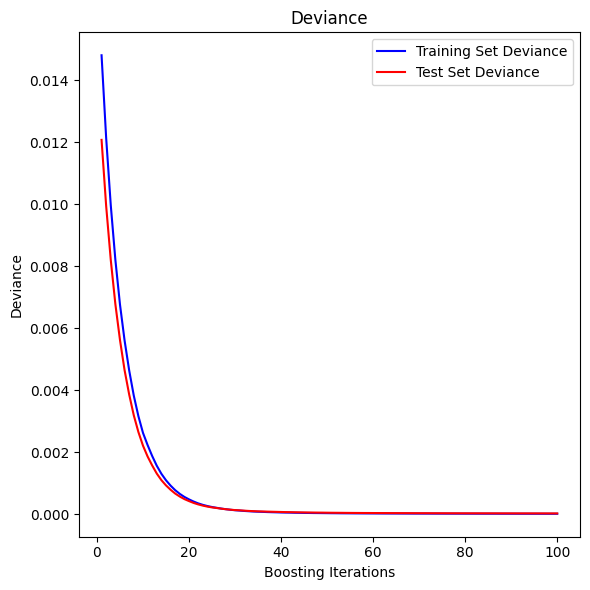

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

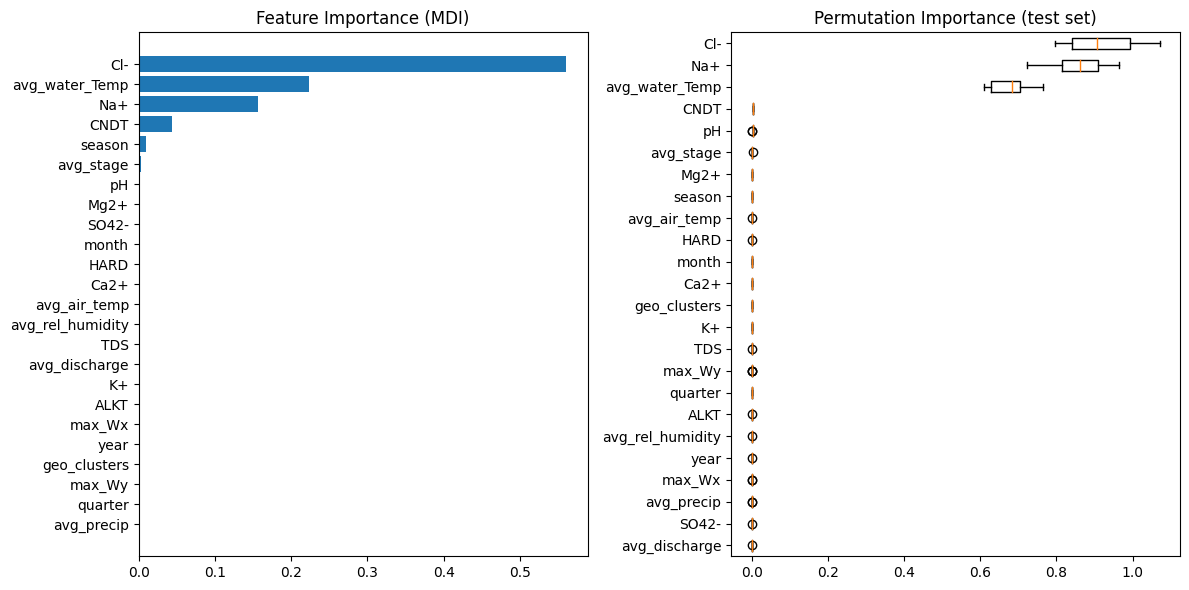

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()